# Ex. 4

In [1]:
id1 = "206263154"
id2 = "209130012"

name_student_1 = "Nave, Lutzky"
name_student_2 = "Shirel, Harel"

from sklearn.ensemble import RandomForestRegressor



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
# from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
#df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
nba_df = pd.read_csv(url)
nba_df.head(3)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN


### solution to question 1:
    
We dropped missing values and present the 3 first lines of the data, only the requested columns-'Salary',' Age','Height','Weight'.

In [34]:
nba_cut = nba_df.dropna()[['Age','Height','Weight','Salary']].copy()

nba_cut.head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


### solution to question 2:

Beacuse we would like to build a model which predict the salary according to 'Age',Height,'Weight', we need to correct the values inside the column of Height. We split the values into feets and inches, and created a new column of Height_in_inch, and saved that column later as Height (which represent height in inches so we have numbers that we can work with). 

In [3]:
nba_cut['feet'] = nba_cut['Height'].str.split('-').str[0].astype("int")
nba_cut['inch'] = nba_cut['Height'].str.split('-').str[1].astype("int")
nba_cut['Height_in_inch']= nba_cut['feet']*12+nba_cut['inch']
nba_new=nba_cut [['Age','Height_in_inch','Weight','Salary']].copy()
nba_new['Height']= nba_cut['Height_in_inch']
nba_new = nba_new.drop(['Height_in_inch'],axis=1).copy()

nba_new.head(3)


,Age,Weight,Salary,Height
0,25.0,180.0,7730337.0,74
1,25.0,235.0,6796117.0,78
3,22.0,185.0,1148640.0,77


### solution to question 3:

We created a pieplot and countplot to the column 'position'.

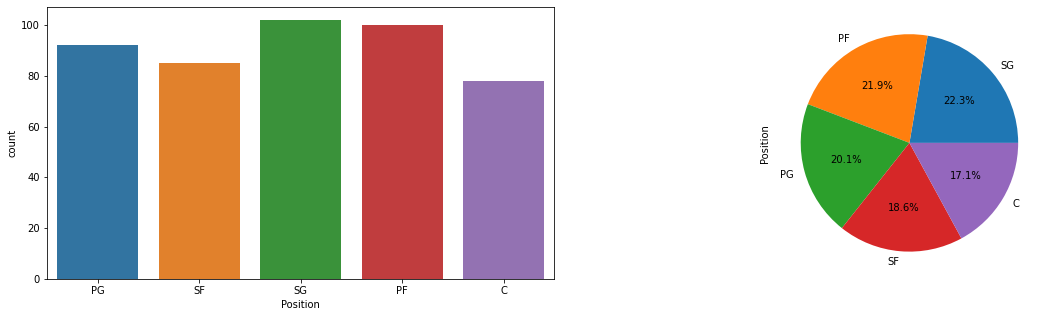

In [23]:
fig,axes= plt.subplots(figsize=(20,5),ncols=2)

sns.countplot(ax=axes[0],x="Position", data=nba_df)
nba_df['Position'].value_counts().plot.pie(ax=axes[1],autopct="%1.1f%%")
plt.show()



#### our conclusion:

We think that the clearest diargram is plot pie because there are percentage that showes us the division between the positions.

### solution to question 4:
    
We split the data 70:30, and present the first 5 line of the features that will be used to tarin the data, and the first 5 line of y_test that will be used to the test.

In [5]:
features = ['Age','Height','Weight']
X = nba_new[features]
y = nba_new['Salary']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head(5)


,Age,Height,Weight
28,28.0,75,205.0
162,31.0,83,232.0
272,25.0,77,230.0
136,25.0,79,240.0
64,26.0,79,220.0


In [6]:
pd.DataFrame(y_test.head())

,Salary
308,1499187.0
252,2489530.0
117,981348.0
168,16407501.0
282,169883.0


### solution to question 5:

We choose the DecisionTreeRegressor model because we want to predict the salary of the players, and Classifier model is not suitable.

In [7]:
def mse(a,b):
    return np.square(a-b).mean()


In [8]:
nba_new_model = DecisionTreeRegressor(random_state=42)
nba_new_model.fit(X_train, y_train)




DecisionTreeRegressor(random_state=42)

### solution to question 6:

We predict the salary according to the features and calculate the accurancy acording to MSE (MSE is the mean square error, a measure for data validation).

In [9]:
test_pred = nba_new_model.predict(X_test)


In [10]:
# df = pd.DataFrame(columns = ['Salary', 'Predictions'])
# df['Salary'] = y_test
# df = df.reset_index(drop=True)
# df['Predictions'] = pd.Series(test_pred)


In [11]:
print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))




MSE: 53218709122263.344


### solution to question 7:

We added the column 'Position' to the data and run the model again.

We saw that after adding 'position', the model was more accurate- MSE turned out to be smaller (means that the deviation is smaller and the model is more accurate).

In [12]:
nba_new['Position']=nba_df.dropna()['Position']
nba_new['Position'] = nba_new['Position'].astype('category').cat.codes

nba_model2 = DecisionTreeRegressor(random_state=42)

features2 = ['Age','Height','Weight','Position']
X2 = nba_new[features2]
y2 = nba_new['Salary']
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=1) 
X2_train.head()


,Age,Height,Weight,Position
28,28.0,75,205.0,2
162,31.0,83,232.0,0
272,25.0,77,230.0,3
136,25.0,79,240.0,3
64,26.0,79,220.0,4


In [13]:
nba_model2.fit(X2_train, y2_train)
test_pred2 = nba_model2.predict(X2_test)

In [14]:
# df2 = pd.DataFrame(columns = ['Salary', 'Predictions2'])
# df2['Salary'] = y2_test
# df2 = df2.reset_index(drop=True)
# df2['Predictions2'] = pd.Series(test_pred2)
# df2

In [15]:
print("MSE: {:.3f}".format(mse(y2_test.values,test_pred2)))
mse1=mse(y2_test.values,test_pred2)

MSE: 52991262394096.438


### solution to question 8:

We limited the depth of the tree

In [16]:
nba_model2 =DecisionTreeRegressor(max_depth=1,random_state=42)

nba_model2.fit(X2_train,y2_train)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [17]:
test_pred3 = nba_model2.predict(X2_test)

In [18]:
mse_limit_depth = mse(y2_test.values,test_pred3)
print("MSE: {:.3f}".format(mse(y2_test.values,test_pred3)))


MSE: 23327966127261.148


In [19]:
# if mse1>mse_limit_depth:
#     print ("mse_limit_depth is better than mse1")